In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fname1 = '../1/book1.jpg'
fname2 = '../1/book2.jpg'
src1_bgr = cv2.imread(fname1)
src2_bgr = cv2.imread(fname2)
src1_rgb = cv2.cvtColor(src1_bgr, cv2.COLOR_BGR2RGB)
src2_rgb = cv2.cvtColor(src2_bgr, cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(src1_bgr, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(src2_bgr, cv2.COLOR_BGR2GRAY)

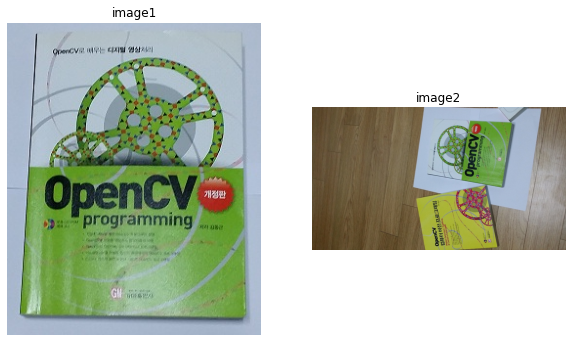

In [3]:
plt.figure(figsize=(10, 30))
image = plt.subplot(1, 2, 1)
image.set_title('image1')
plt.axis('off')
plt.imshow(src1_rgb)

image = plt.subplot(1, 2, 2)
image.set_title('image2')
plt.axis('off')
plt.imshow(src2_rgb)

In [4]:
# keypoint detector
orb = cv2.ORB_create(nfeatures = 1000)
brisk = cv2.BRISK_create()
detector = [orb, brisk]

didx = 1
kp1, des1 = detector[didx].detectAndCompute(img1, None)
kp2, des2 = detector[didx].detectAndCompute(img2, None)

# of matches = 526
matches[0] = (queryIdx:759, trainIdx:1625, distance:17.0)
matches[1] = (queryIdx:473, trainIdx:1333, distance:24.0)
matches[2] = (queryIdx:220, trainIdx:95, distance:27.0)
matches[3] = (queryIdx:735, trainIdx:100, distance:30.0)
matches[4] = (queryIdx:342, trainIdx:486, distance:31.0)
matches[5] = (queryIdx:343, trainIdx:437, distance:32.0)
matches[6] = (queryIdx:928, trainIdx:1371, distance:32.0)
matches[7] = (queryIdx:392, trainIdx:358, distance:33.0)
matches[8] = (queryIdx:283, trainIdx:527, distance:34.0)
matches[9] = (queryIdx:830, trainIdx:1410, distance:34.0)


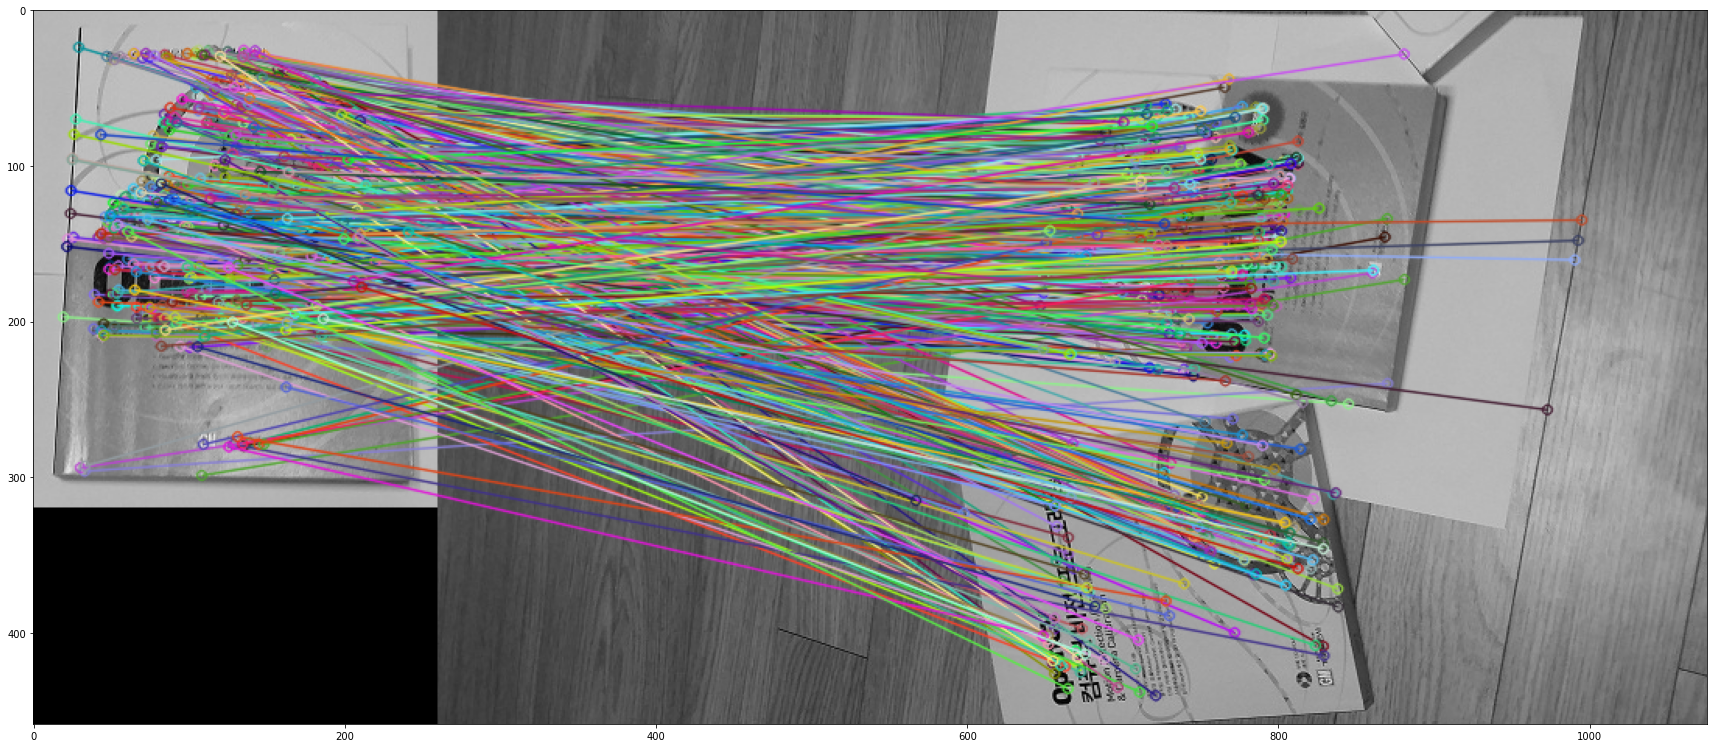

In [5]:
# matcher
bf = cv2.BFMatcher_create(cv2.NORM_HAMMING, crossCheck= True)
flann = cv2.FlannBasedMatcher_create()
matcher = [bf, flann]

midx = 0
try:
    matches = matcher[midx].match(des1, des2)
except:
    matches = matcher[midx].match(np.float32(des1), np.float32(des2))

# display    
matches = sorted(matches, key = lambda x:x.distance)
print(f'# of matches = {len(matches)}')
for i, m in enumerate (matches[:10]):
    print(f'matches[{i}] = (queryIdx:{m.queryIdx}, trainIdx:{m.trainIdx}, distance:{m.distance})')
    
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=2)
plt.figure(figsize=(30, 60))
plt.imshow(img3)
plt.show()

#of good matches = 10


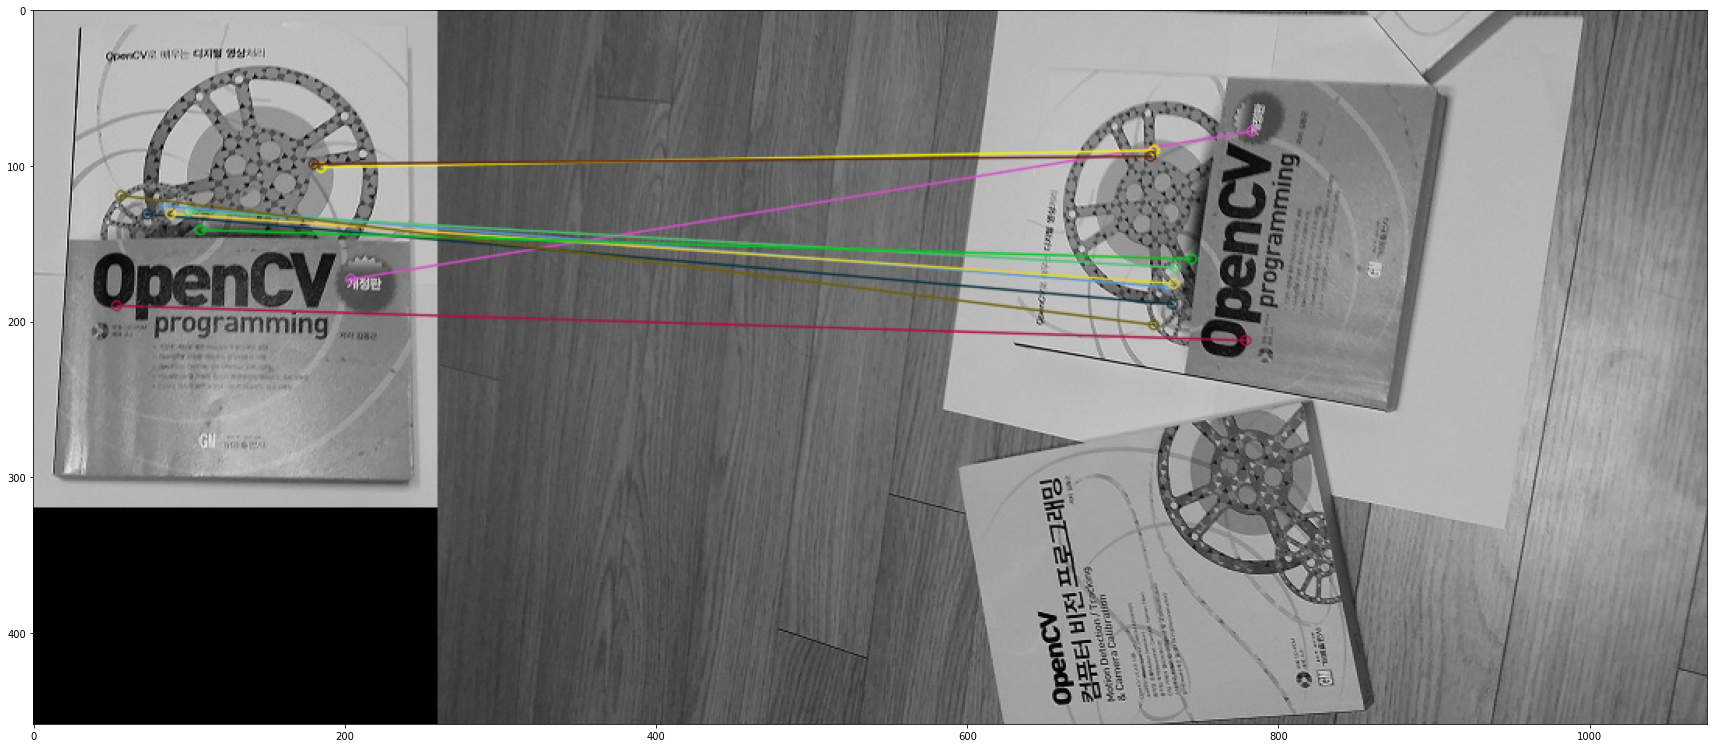

In [6]:
### GOOD MATCHING
minDist = matches[0].distance
good_matches = list(filter(lambda m:m.distance<=2*minDist, matches))### <- 교수님이 정한 기준
print(f'#of good matches = {len(good_matches)}')
if(len(good_matches)<5):
    print('sorry, too small good matches')
    exit()

img4 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)
plt.figure(figsize=(30, 60))
plt.imshow(img4)
plt.show()

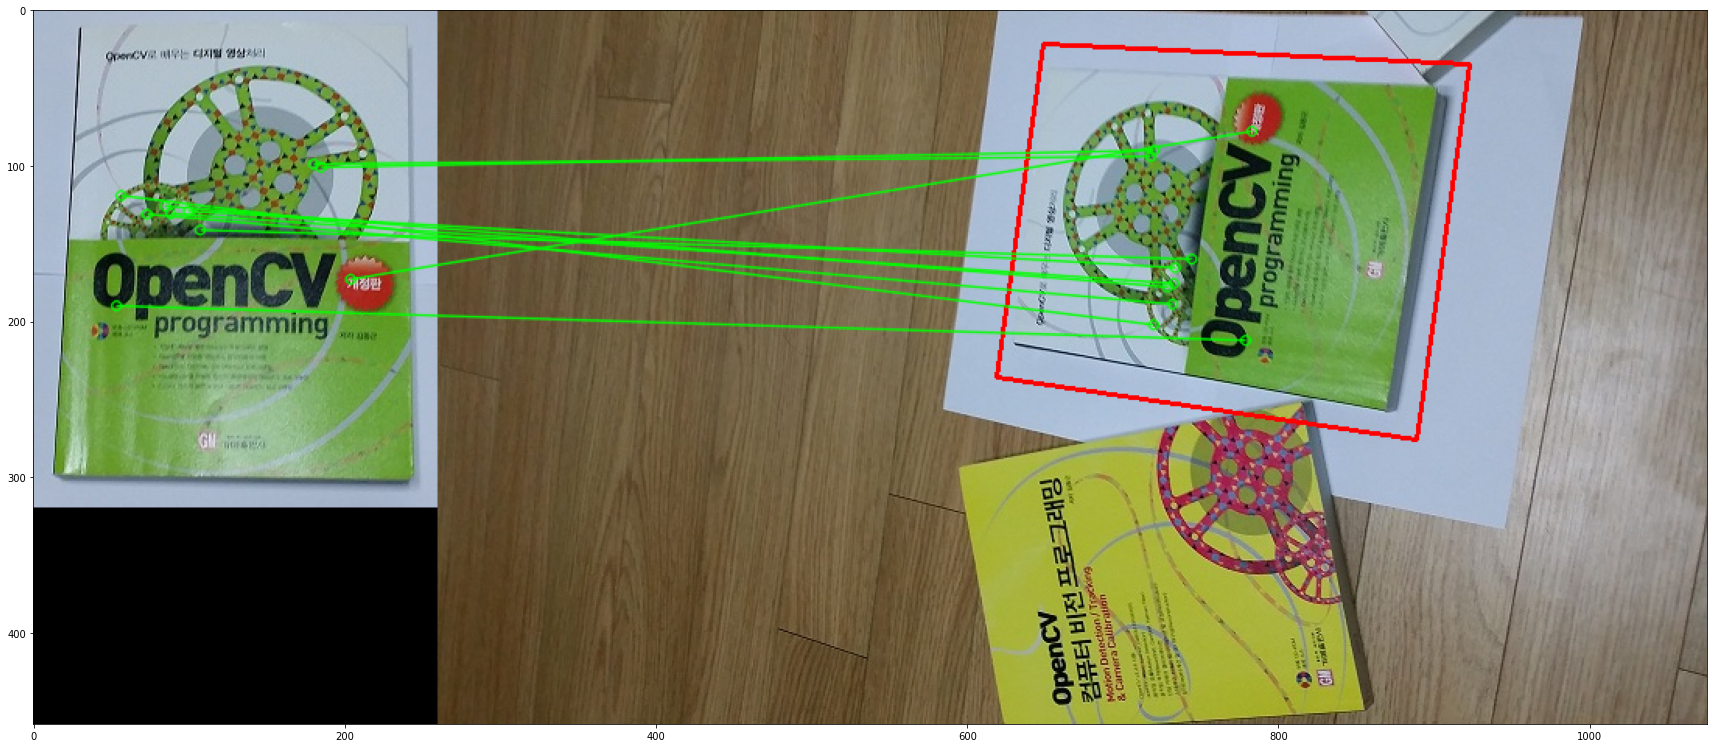

In [7]:
# homography
src1_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches])
src2_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches])

H, mask = cv2.findHomography(src1_pts, src2_pts, cv2.RANSAC, 3.0)
mask_matches = mask.flatten().tolist()

h, w = img1.shape
pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)
pts2 = cv2.perspectiveTransform(pts, H)
src2_rgb = cv2.polylines(src2_rgb, [np.int32(pts2)], True, (255, 0, 0), 2)

# display
draw_params = dict(matchColor=(0, 255, 0), singlePointColor=None,
                  matchesMask=mask_matches, flags=2)
img5 = cv2.drawMatches(src1_rgb, kp1, src2_rgb, kp2, good_matches, None, **draw_params)
plt.figure(figsize=(30, 30))
plt.imshow(img5)
plt.show()